Q1) Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Import Data Set
data = pd.read_excel("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Forecasting\\Airlines_passengers_data.xlsx",engine='openpyxl')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#### Transformations

In [7]:
data["Log_Passengers"]=np.log(data.Passengers)
data["t"]=range(1,97)
data["t_square"]=data.t*data.t
data.head()

,Month,Passengers,Log_Passengers,t,t_square
0,1995-01-01,112,4.718499,1,1
1,1995-02-01,118,4.770685,2,4
2,1995-03-01,132,4.882802,3,9
3,1995-04-01,129,4.859812,4,16
4,1995-05-01,121,4.795791,5,25


In [4]:
data['year']=0
for i in range(144):
    q=data['Month'][i]
    data['year'][i]=q[0:4]
data['month']=0
for i in range(144):
    q=data['Month'][i]
    data['month'][i]=q[5:7]
replace_values = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar',4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec" }    
data=data.replace({'month':replace_values})
data

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Month,Passengers,Log_Passengers,t,t_square,year,month
0,1949-01,112,4.718499,1,1,1949,Jan
1,1949-02,118,4.770685,2,4,1949,Feb
2,1949-03,132,4.882802,3,9,1949,Mar
3,1949-04,129,4.859812,4,16,1949,Apr
4,1949-05,121,4.795791,5,25,1949,May
...,...,...,...,...,...,...,...
139,1960-08,606,6.406880,140,19600,1960,Aug
140,1960-09,508,6.230481,141,19881,1960,Sep
141,1960-10,461,6.133398,142,20164,1960,Oct
142,1960-11,390,5.966147,143,20449,1960,Nov


In [5]:
M_dummy=pd.get_dummies(data['month'])
M_dummy=pd.DataFrame(M_dummy)
M_dummy=M_dummy[['Jan']+['Feb']+['Mar']+["Apr"]+["May"]+["Jun"]+["Jul"]+["Aug"]+["Sep"]+["Oct"]+["Nov"]+["Dec"]]

In [6]:
data1=data.join(M_dummy)
data1.head()

,Month,Passengers,Log_Passengers,t,t_square,year,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1949-01,112,4.718499,1,1,1949,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,1949-02,118,4.770685,2,4,1949,Feb,0,1,0,0,0,0,0,0,0,0,0,0
2,1949-03,132,4.882802,3,9,1949,Mar,0,0,1,0,0,0,0,0,0,0,0,0
3,1949-04,129,4.859812,4,16,1949,Apr,0,0,0,1,0,0,0,0,0,0,0,0
4,1949-05,121,4.795791,5,25,1949,May,0,0,0,0,1,0,0,0,0,0,0,0


#### Visualization

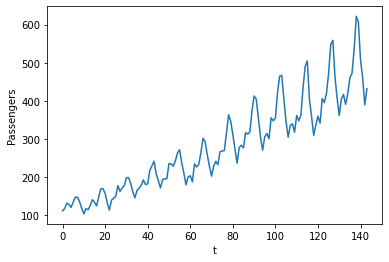

In [7]:
data1.Passengers.plot()
plt.ylabel("Passengers")
plt.xlabel("t")
plt.show()

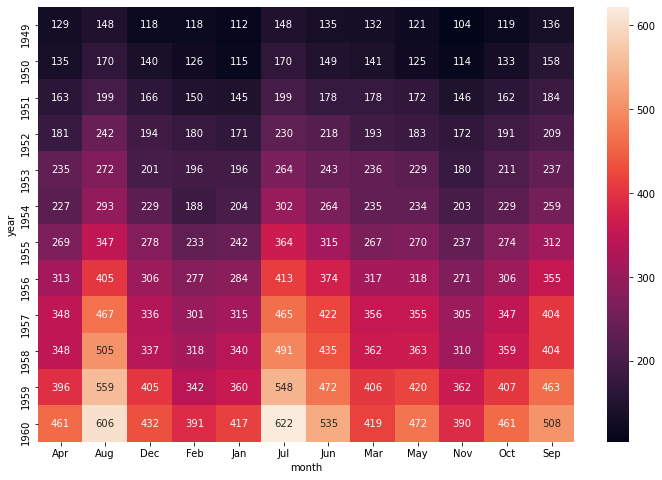

In [8]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

# Heatmap of footfalls

Interpretation: from the above fig., In July 1960, there are highest passengers(622)

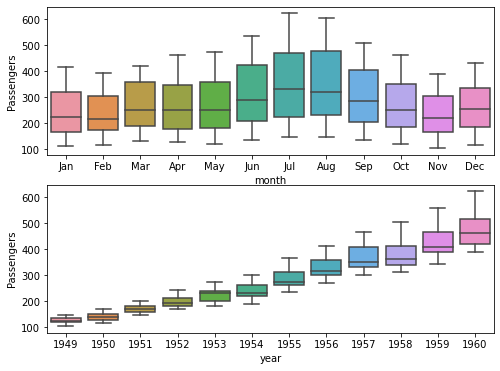

In [9]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data1)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data1)
plt.show()


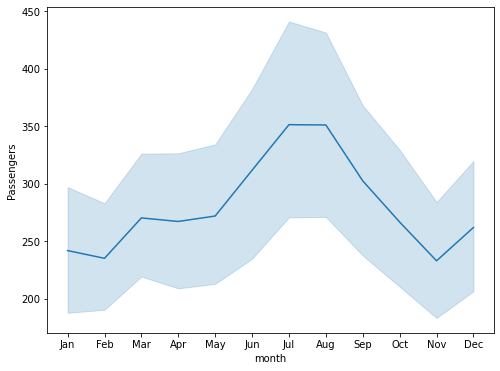

In [10]:
plt.figure(figsize=(8,6))
sns.lineplot(x="month",y="Passengers",data=data1)
plt.show()

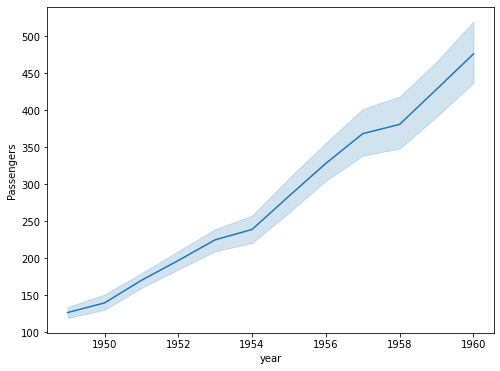

In [11]:
plt.figure(figsize=(8,6))
sns.lineplot(x="year",y="Passengers",data=data1)
plt.show()

Interpretation : from the above plots, More number of passanger prefer to use airline from july to august and number of passernger get increased year by year

In [12]:
data1.head()

,Month,Passengers,Log_Passengers,t,t_square,year,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1949-01,112,4.718499,1,1,1949,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,1949-02,118,4.770685,2,4,1949,Feb,0,1,0,0,0,0,0,0,0,0,0,0
2,1949-03,132,4.882802,3,9,1949,Mar,0,0,1,0,0,0,0,0,0,0,0,0
3,1949-04,129,4.859812,4,16,1949,Apr,0,0,0,1,0,0,0,0,0,0,0,0
4,1949-05,121,4.795791,5,25,1949,May,0,0,0,0,1,0,0,0,0,0,0,0


#### Splitting data

In [13]:
Train = data1.head(115)
Test = data1.tail(29)

## Forecasting Model Based Methods

In [14]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

73.8049023621349

In [15]:
#Exponential

Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


85.91156211513756

In [16]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

73.10171864598607

In [17]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

208.58513769668178

In [18]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

43.540709051601326

In [19]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

223.34314249078466

In [20]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

52.84139574387579

In [21]:
#multiplicative seasonality with quadratic trend
Mul_Quad= smf.ols('Log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_Mul_quad= pd.Series(Mul_Quad.predict(Test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mul_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mul_quad)))**2))
rmse_Mul_quad

24.388889550208052

In [22]:
#Compare the results 

data = {"MODEL":pd.Series(["Linear Model","Exponential","Quadratic","Additive seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Multiplicative Additive Seasonality ","multiplicative seasonality with quadratic trend"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mul_quad]),"Dummy_Variables":pd.Series(["--","--","--","11","11","11","11","11"])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,Dummy_Variables
7,multiplicative seasonality with quadratic trend,24.388890,11
4,Additive Seasonality Quadratic,43.540709,11
6,Multiplicative Additive Seasonality,52.841396,11
2,Quadratic,73.101719,--
0,Linear Model,73.804902,--
1,Exponential,85.911562,--
3,Additive seasonality,208.585138,11
5,Multiplicative Seasonality,223.343142,11


#### Interpretation: From above table,"Multiplicative Additive Seasonality Model" with lowest RMSE value (225.524390) is best to do forecasting 

## Forecasting Data Driven Model

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Moving Average

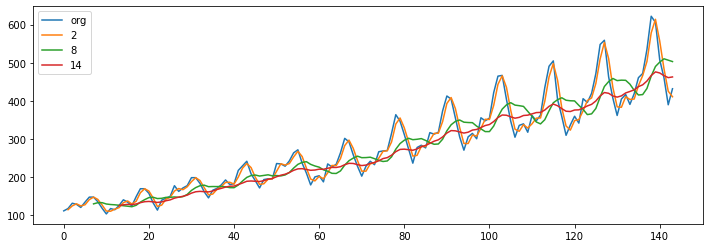

In [24]:
plt.figure(figsize=(12,4))
data1.Passengers.plot(label="org")
for i in range(2,20,6):
    data1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time series decomposition plot 


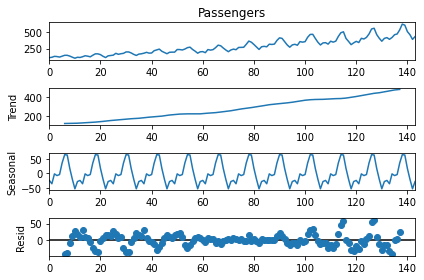

In [25]:
decompose_ts_add = seasonal_decompose(data1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

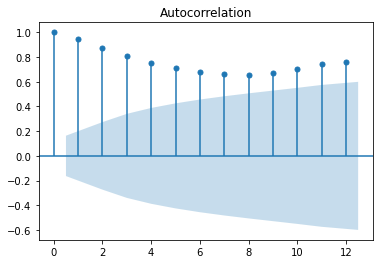

In [26]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.Passengers,lags=12)
plt.show()


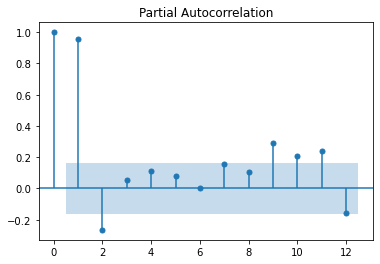

In [27]:
tsa_plots.plot_pacf(data1.Passengers,lags=12)
plt.show()

### Evaluation Metric MAPE

In [28]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [29]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\Users\1234\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


13.92129732857442

### Holt method 

In [30]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  


87.99861820921055

### Holts winter exponential smoothing with additive seasonality and additive trend


In [31]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

6.708701733236379

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

4.818283630718842

## Final Model by combining train and test

In [33]:
hwe_model_mul_add = ExponentialSmoothing(data1["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [34]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

144    445.242731
145    418.225788
146    465.310384
147    494.952052
148    505.476789
149    573.313810
150    663.597881
151    654.905667
152    546.762510
153    488.448335
dtype: float64

# ARIMA Model

In [35]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
data = pd.read_csv("C:/Users/1234/Downloads/airline-passengers.csv")
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [37]:
Modified_data=data.set_index(keys=["Month"],drop=True)
Modified_data

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


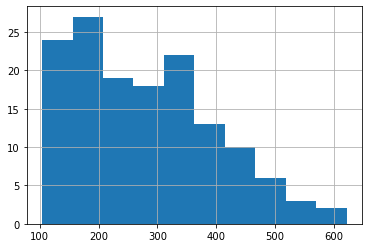

In [38]:
data["Passengers"].hist()
plt.show()

<AxesSubplot:ylabel='Density'>

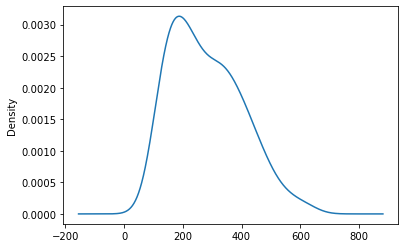

In [39]:
data["Passengers"].plot(kind='kde')

In [40]:
# separate out a validation dataset
split_point = len(Modified_data) - 10
dataset, validation = Modified_data[0:split_point], Modified_data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset1.csv', header=False)
validation.to_csv('validation1.csv', header=False)

Dataset 134, Validation 10


#### Persistence/ Base model

In [41]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values


In [42]:
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391], dtype=int64)

In [43]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [44]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
>Predicted=278.000, Expected=284.000
>Predicted=284.000, Expected=277.000
>Predicted=277.000, Expected=317.000
>Predicted=317.000, Expected=313.000
>Predicted=313.000, Expected=318.000
>Predicted=318.000, Expected=374.000
>Predicted=374.000, Expected=413.000
>Predicted=413.000, Expected=405.000
>Predicted=405.000, Expected=355.000
>Predicted=355.000, Expected=306.000
>

#### ARIMA Hyperparameters

In [45]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values


In [46]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [47]:
train = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
Name: 1, Length: 134, dtype: int64

In [48]:
# load dataset
train = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 6)
d_values = range(0, 6)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=144.796
ARIMA(0, 0, 1) RMSE=77.293
ARIMA(0, 1, 0) RMSE=40.117
ARIMA(0, 1, 1) RMSE=37.900
ARIMA(0, 1, 2) RMSE=39.910
ARIMA(0, 1, 3) RMSE=38.479
ARIMA(0, 1, 4) RMSE=30.389
ARIMA(0, 2, 0) RMSE=47.004
ARIMA(0, 2, 1) RMSE=40.850
ARIMA(0, 2, 2) RMSE=38.454
ARIMA(0, 2, 3) RMSE=39.414
ARIMA(0, 2, 4) RMSE=41.120
ARIMA(0, 2, 5) RMSE=32.662
ARIMA(1, 0, 0) RMSE=40.279
ARIMA(1, 0, 1) RMSE=37.836
ARIMA(1, 0, 2) RMSE=38.616
ARIMA(1, 1, 0) RMSE=38.496
ARIMA(1, 1, 1) RMSE=37.225
ARIMA(1, 2, 0) RMSE=46.751
ARIMA(2, 0, 0) RMSE=38.322
ARIMA(2, 1, 0) RMSE=37.870
ARIMA(2, 1, 1) RMSE=33.090
ARIMA(2, 2, 0) RMSE=45.724
ARIMA(3, 0, 0) RMSE=37.805
ARIMA(3, 0, 1) RMSE=35.217
ARIMA(3, 1, 0) RMSE=37.694
ARIMA(3, 1, 1) RMSE=33.239
ARIMA(3, 2, 0) RMSE=45.417
ARIMA(4, 0, 0) RMSE=37.794
ARIMA(4, 1, 0) RMSE=37.192
ARIMA(4, 1, 1) RMSE=33.682
ARIMA(4, 2, 0) RMSE=42.065
ARIMA(5, 0, 0) RMSE=37.334
ARIMA(5, 1, 0) RMSE=37.366
ARIMA(5, 1, 1) RMSE=34.005
ARIMA(5, 2, 0) RMSE=42.548
ARIMA(5, 2, 1) RMSE=37.941


#### Build Model based on the optimized values

In [49]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [50]:
# load data
#train = read_csv('dataset_Cocola.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

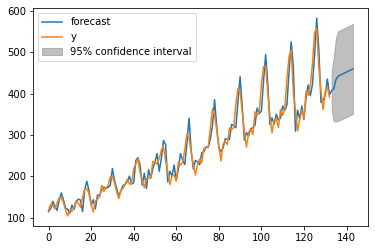

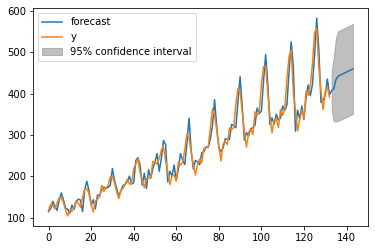

In [51]:
# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 144)

In [52]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = np.sqrt(mean_squared_error(val[1], forecast))
rmse

151.86667340085262

In [53]:
forecast

array([407.50448581, 411.49087398, 433.92490893, 442.37824146,
       444.892617  , 447.40699254, 449.92136808, 452.43574362,
       454.95011916, 457.46449469])